In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv("UpdatedResumeDataSet.csv")


In [115]:

df.shape 

(962, 2)

In [116]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

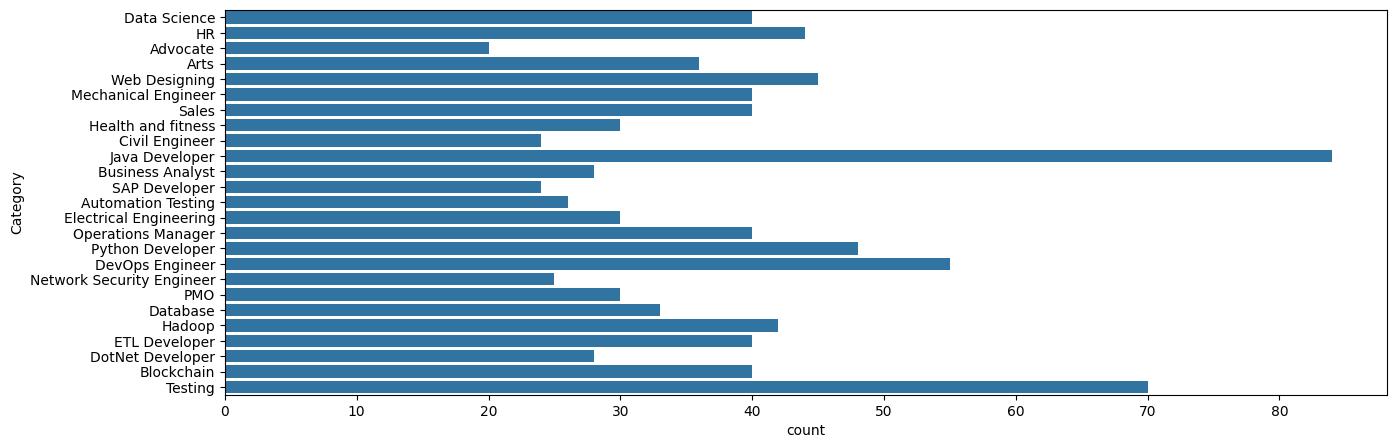

In [117]:
plt.figure(figsize=(15,5))
sns.countplot(df["Category"])
plt.show()

([<matplotlib.patches.Wedge at 0x182d1d7f470>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169058, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1.

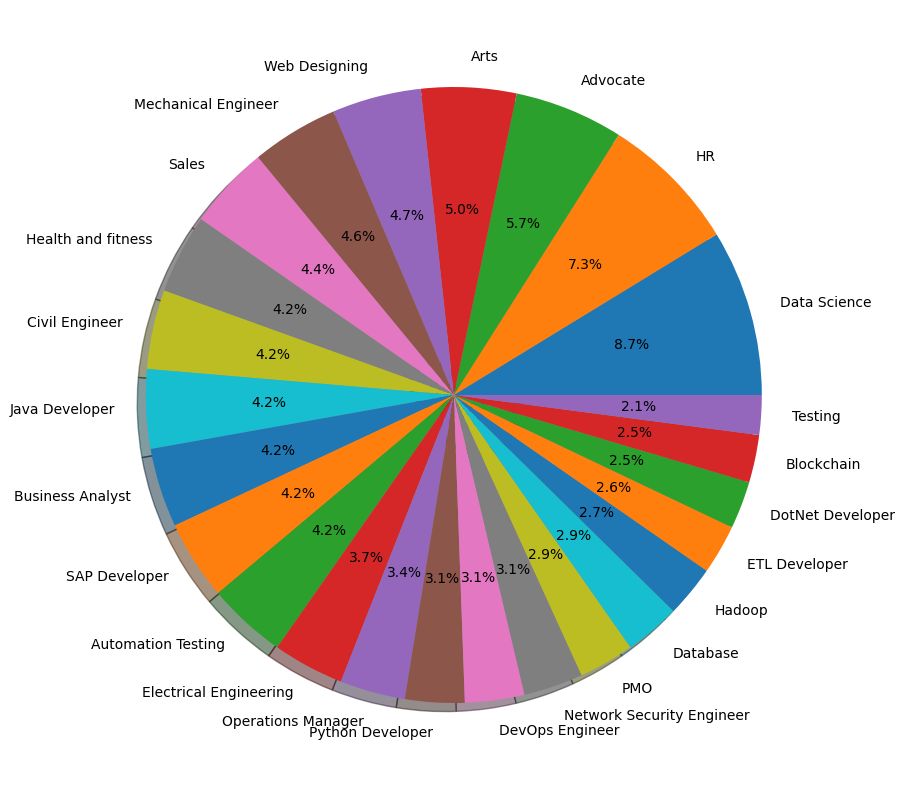

In [118]:
counts = df["Category"].value_counts()
labels =df["Category"].unique()

plt.figure(figsize=(15,10))

plt.pie(counts, labels = labels , autopct='%1.1f%%', shadow=True)


In [119]:
import re
def cleanResume(resume_text):
    clean_text = re.sub('http\S+\s*', ' ', resume_text)
    clean_text = re.sub('RT|cc', ' ', clean_text)
    clean_text = re.sub('#\S+', '', clean_text)
    clean_text = re.sub('@\S+', '  ', clean_text)
    clean_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', clean_text)
    clean_text = re.sub(r'[^\x00-\x7f]', r' ', clean_text)
    clean_text = re.sub('\s+', ' ', clean_text)
    return clean_text

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mdkg2\AppData\Local\Temp\ipykernel_6456\910030493.py:3: SyntaxWarning: invalid escape sequence '\S'
  clean_text = re.sub('http\S+\s*', ' ', resume_text)
C:\Users\mdkg2\AppData\Local\Temp\ipykernel_6456\910030493.py:5: SyntaxWarning: invalid escape sequence '\S'
  clean_text = re.sub('#\S+', '', clean_text)
C:\Users\mdkg2\AppData\Local\Temp\ipykernel_6456\910030493.py:6: SyntaxWarning: invalid escape sequence '\S'
  clean_text = re.sub('@\S+', '  ', clean_text)
C:\Users\mdkg2\AppData\Lo

In [120]:
cleanResume(" Full Stack Web developer and Blockchain , https://diwakar-portfolio.vercel.app/m")

' Full Stack Web developer and Blockchain '

In [121]:
df["Resume"]= df["Resume"].apply(lambda x: cleanResume(x))

In [122]:
# df['Resume'][1]
print(df["Category"].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [123]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [124]:
le.fit(df["Category"])

df["Category"]= le.transform(df["Category"])
print(df["Category"].unique())

[ 6 12  0  1 24 16 22 14  5 15  4 21  2 11 18 20  8 17 19  7 13 10  9  3
 23]


In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words="english")

tfidf.fit(df["Resume"])

requiredTaxt = tfidf.transform(df["Resume"])


In [126]:
from sklearn.model_selection import train_test_split

x_train , x_test ,y_train, y_test = train_test_split(requiredTaxt, df["Category"], test_size=0.2 , random_state=42)


In [127]:

print(x_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 129201 stored elements and shape (769, 7351)>
  Coords	Values
  (0, 0)	0.05483879750920866
  (0, 27)	0.07098795005059498
  (0, 93)	0.027443321347834525
  (0, 97)	0.027553674294237575
  (0, 100)	0.025005676732766255
  (0, 233)	0.05736700379973352
  (0, 256)	0.03147670668296769
  (0, 397)	0.04409847503945869
  (0, 401)	0.05561570347795872
  (0, 444)	0.067972054288037
  (0, 464)	0.04684895325560396
  (0, 542)	0.06319205448737587
  (0, 543)	0.029234615740458922
  (0, 713)	0.07098795005059498
  (0, 718)	0.049634434619816266
  (0, 719)	0.11667881053826354
  (0, 761)	0.026057184684747495
  (0, 795)	0.07098795005059498
  (0, 958)	0.07098795005059498
  (0, 961)	0.07098795005059498
  (0, 967)	0.041921701648478964
  (0, 989)	0.14161307371443246
  (0, 1007)	0.11894144322418991
  (0, 1066)	0.05058813117123764
  (0, 1071)	0.07098795005059498
  :	:
  (768, 3569)	0.14240788368628354
  (768, 3659)	0.05255968173516851
  (768, 3733)	0.11381199

In [128]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.multiclass import OneVsOneClassifier

from sklearn.metrics import accuracy_score

clf = OneVsOneClassifier(KNeighborsClassifier())

clf.fit(x_train,y_train)

ypred = clf.predict(x_test)

print(accuracy_score(y_test, ypred))

0.9844559585492227


In [129]:
resume=""" Vishal
+91 6398669637 vishalkumaretahkash@gmail.com Gurgaon, INDIA
Profile
Passionate and motivated fresher seeking to leverage acquired skills in Business
Development through practical experience. Eager to contribute to innovative marketing
campaigns and drive measurable results for a dynamic organization.
Areas of Expertise
Converting Leads or handling Leads, Content Marketing, Content Strategy, Search Engine
Ranking, Microsoft Office Suite, Data Analysis, Social Media, User Experience, Digital
Strategy, Campaign Management, Content marketing, Google Analytics, Paid advertising
(Google Ads, Facebook Ads), Coding web development
Professional Experience
Sales Intern, (SWS Connects) 23rd May 2023 - 19th Jan 2024
● Developed persuasive pitches to convince clients of the
value of our services.
● Created visually appealing flyers and organized their
distribution, supplemented by Google Ads campaigns
● Implemented SEO strategies to improve website visibility
and attract organic traffic
● Generated leads through engaging blog content aimed at
driving audience interaction
● Managed the execution of comprehensive digital marketing
strategies across multiple channels.
● Achieved increased brand visibility and customer acquisition
through effective campaign implementation.
Digital media and Content Creator, (Prestloans) 20th May 2024 - 2ndJuly2024
● Created engaging social media posts using Canva
● Edited videos with Canva
● Developed content strategies
Education
Bachelor of Computer Application (BCA), Br Ambedkar University Agra 2020 - 2023
Online Courses & Certifications
• Digital Marketing Certification Udemy (May. 2024) - Certificate
• Digital Marketing and Sales Inter (Jan. 2024) - Certificate
Skills
• Software: Canva, MsOffice Suite
• Business Development Skills: Market Research & Analysis, Lead Generation, Relationship
Building, Negotiation & Closing.
• SEO: Google Search Console, Analytics, Trends, Coded website
• Digital Marketing: Social Media Optimization, Content Writing, Campaign Analysis. On-Page
SEO, Off-Page SEO
• Soft Skills: Presentation, Planning, Organized, Creative Problem-Solving, Teamwork,
Active Listening, Adaptability, Analytical Thinking
Languages
• English, Hindi (written and spoken)
"""

In [130]:

pureResume  = cleanResume(resume)


resumeVector = tfidf.transform([pureResume])

ans = clf.predict(resumeVector)
print(ans)

[22]
